In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib_venn as venn
from math import pi 
from pandas.plotting import parallel_coordinates
import plotly.graph_objs as go 
import chart_studio.plotly as py 
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings 
warnings.filterwarnings("ignore")
import os
print(os.listdir("."))
import missingno as msno
import networkx as nx

['database.sqlite', 'Iris.csv', 'rare_tools.ipynb']


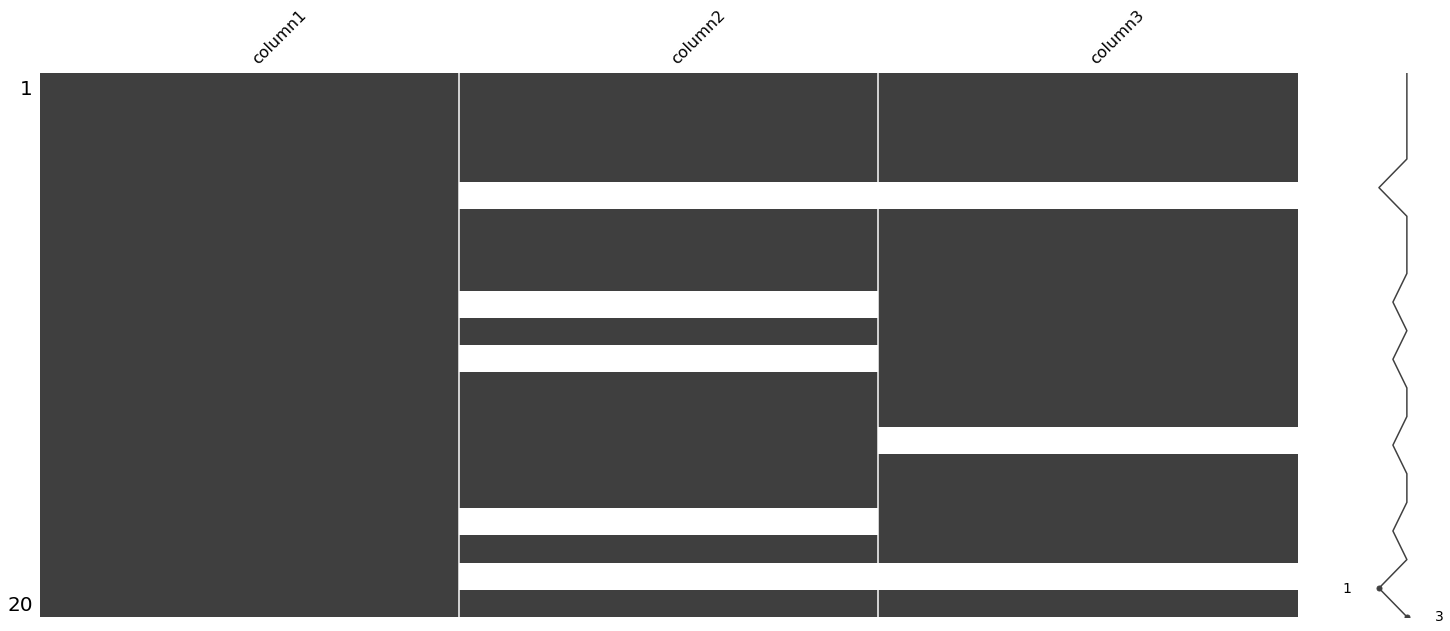

In [7]:
#MATRIX and Bar Plots(Missingno)
dictionary = {"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}
data_missingno =pd.DataFrame(dictionary)
msno.matrix(data_missingno)
plt.show()

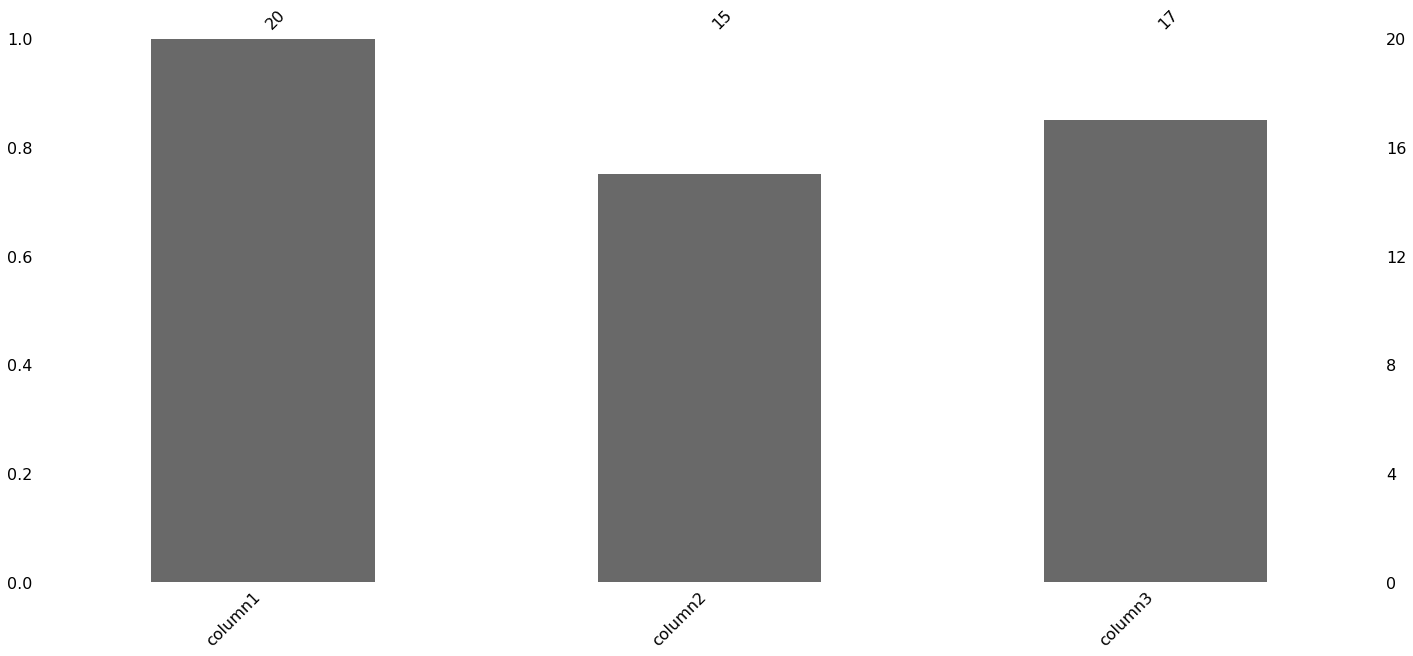

In [8]:
#missingno bar plot
msno.bar(data_missingno)
plt.show()

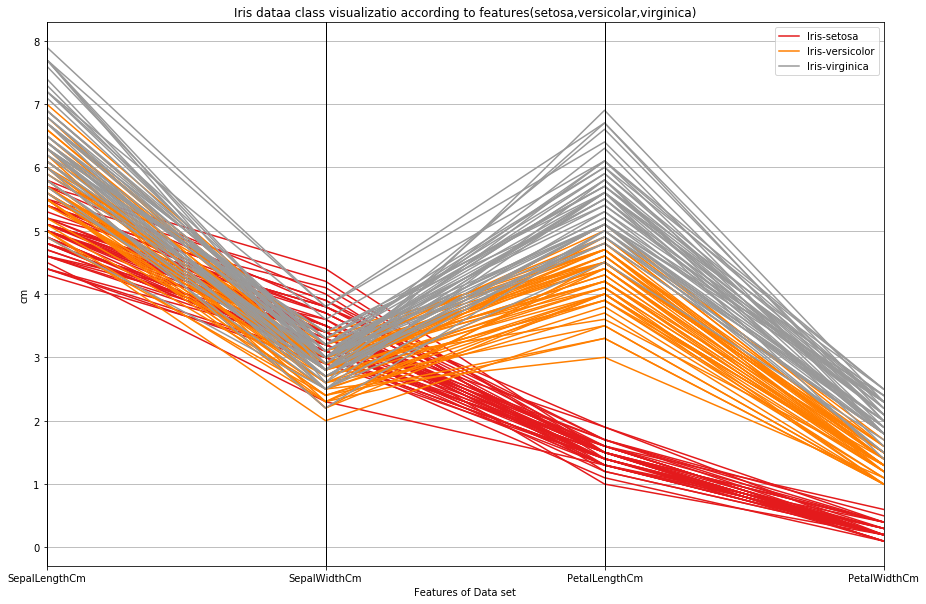

In [13]:
# Parallel Plots(Pandas)
data = pd.read_csv("Iris.csv")
data = data.drop(['Id'],axis=1)
plt.figure(figsize=(15,10))
parallel_coordinates(data,'Species',colormap=plt.get_cmap("Set1"))
plt.title("Iris dataa class visualizatio according to features(setosa,versicolar,virginica)")
plt.xlabel("Features of Data set")
plt.ylabel("cm")
plt.show()

In [20]:
links

,var1,var2,value
0,SepalLengthCm,SepalLengthCm,1.000000
1,SepalLengthCm,SepalWidthCm,-0.109369
2,SepalLengthCm,PetalLengthCm,0.871754
3,SepalLengthCm,PetalWidthCm,0.817954
4,SepalWidthCm,SepalLengthCm,-0.109369
5,SepalWidthCm,SepalWidthCm,1.000000
6,SepalWidthCm,PetalLengthCm,-0.420516
7,SepalWidthCm,PetalWidthCm,-0.356544
8,PetalLengthCm,SepalLengthCm,0.871754
9,PetalLengthCm,SepalWidthCm,-0.420516


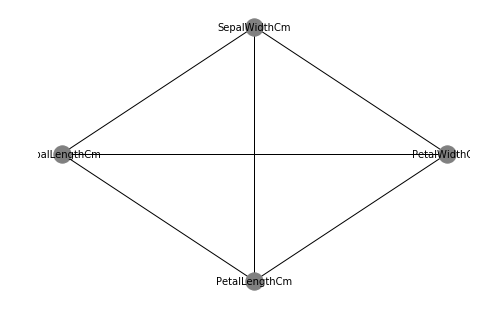

In [27]:
#Network Charts (Networkx)
corr = data.corr()
links = corr.stack().reset_index()
links.columns = ['var1','var2','value']
#correlation
threshold = -1
links_filtered = links.loc[(links['value']>= threshold) & (links['var1']!=links['var2'])]
# Build your graph
G=nx.from_pandas_edgelist(links_filtered,'var1','var2')
nx.draw_circular(G,with_labels=True,node_color='grey',node_size=300,edge_color='black',linewidths=1,font_size=10)


In [29]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


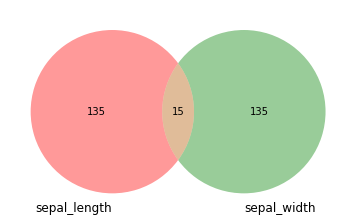

In [38]:
# Venn(Matplotlib)
from matplotlib_venn import venn2
sepal_length = data.iloc[:,0]
sepal_width = data.iloc[:,1]
petal_length = data.iloc[:,2]
petal_width = data.iloc[:,3]
#
venn2(subsets=(len(sepal_length)-15,len(sepal_width)-15,15),set_labels=("sepal_length","sepal_width"))
plt.show()

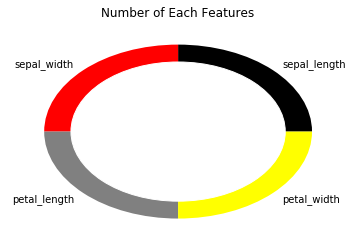

In [44]:
# Donut Plot
feature_names = "sepal_length","sepal_width","petal_length","petal_width"
feature_size=[len(sepal_length),len(sepal_width),len(petal_length),len(petal_width)]
circle = plt.Circle((0,0),0.8,color='white')
plt.pie(feature_size,labels=feature_names,colors=['black','red','grey','yellow'])
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Number of Each Features")
plt.show()

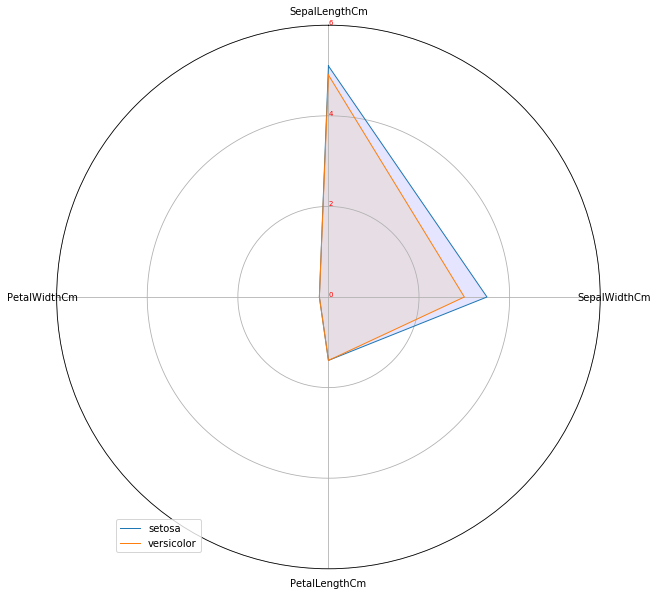

In [45]:
# spider graph
categories = list(data)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = data.loc[0].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="setosa" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[1].drop("Species").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="versicolor" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

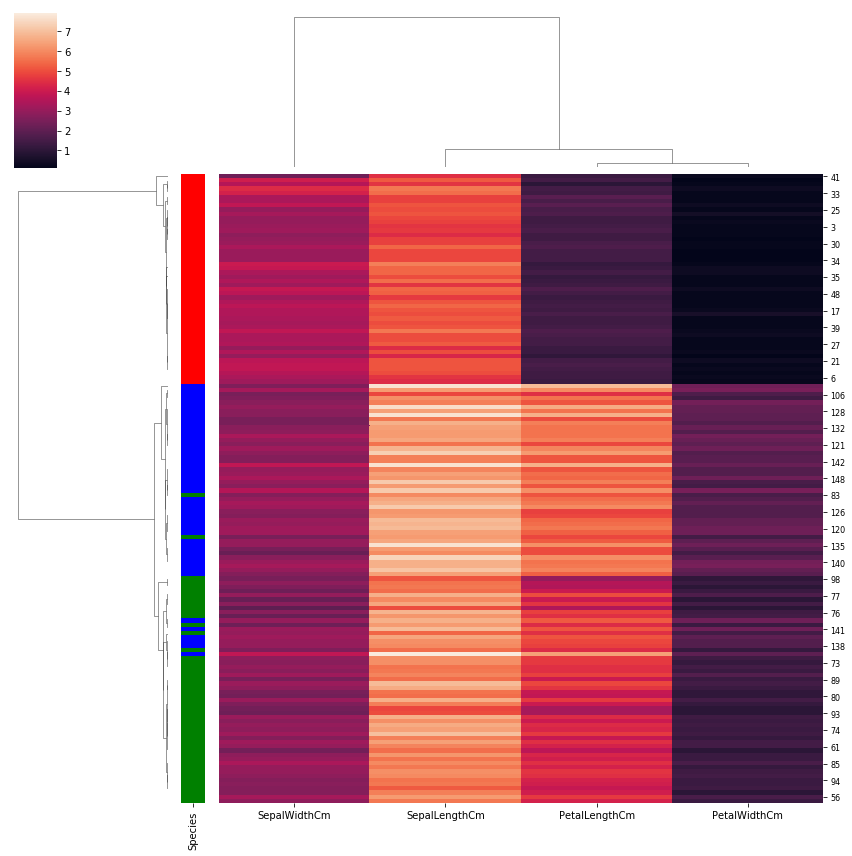

In [49]:
#Cluster Map (Seaborn)
df =data.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df1 = data.Species
x= dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12,12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation=0,size=8)
plt.show()

In [51]:
#Inset Plots
trace1=go.Scatter(
    x=df.index,
    y=df.SepalLengthCm,
    mode="markers",
    xaxis='x2',
    yaxis='y2',
    name="SepalLengthCm",
    marker=dict(color='rgba(0, 122, 20, 0.8)')
)
trace2 = go.Histogram(
    x=df.SepalLengthCm,
    opacity=0.8,
    name="Sepal Length(cm)",
    marker=dict(color='rgba(10,200,250,0.6)')
)
data = [trace1,trace2]
layout = go.Layout(
    xaxis2=dict(domain=[0.7,1],anchor='y2'),
    yaxis2=dict(domain=[0.6,0.95],anchor='x2'),
    title="Sepal Length(cm) Histogram and Scatter Plot"
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

In [56]:
#Basic 3D scatter (plotly)
data = pd.read_csv("Iris.csv")
iris_setosa = data[data=="Iris-setosa"]
iris_virginica = data[data.Species=="Iris-virginica"]
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name='iris_setosa',
    marker=dict(color='rgb(217,100,100)',size=12,line=dict(color='rgb(255,255,255)',width=0.1))
)
trace2=go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode="markers",
    name="iris_virginica",
    marker=dict(color='rgb(54,170,127)',size=12,line=dict(color='rgb(204,204,204)',width=0.1))
)
data = [trace1,trace2]
layout = go.Layout(
    title="3D iris_setosa and iris_virginica",
    margin=dict(l=0,r=0,b=0,t=0)
)
fig=go.Figure(layout=layout , data=data)
iplot(fig)

In [59]:
# import data again
data = pd.read_csv('Iris.csv')
# data of iris setosa
iris_setosa = data[data.Species == "Iris-setosa"]
# # data of iris virginica
iris_virginica = data[data.Species == "Iris-virginica"]

# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=iris_setosa.SepalLengthCm,
    y=iris_setosa.SepalWidthCm,
    z=iris_setosa.PetalLengthCm,
    mode='markers',
    name = "iris_setosa",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=iris_virginica.SepalLengthCm,
    y=iris_virginica.SepalWidthCm,
    z=iris_virginica.PetalLengthCm,
    mode='markers',
    name = "iris_virginica",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title = ' 3D iris_setosa and iris_virginica',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)